In [25]:
#!/usr/bin/env python3
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import IPython.display
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
#Pipeline:
#0normalization
#0linear regression as our baseline

#1Baseline, take mean of the data points (MPG) to determine baseline
    #younes' suggestion when we predict using Total MPG
    #we might just ignore this then

#2Another thing to predict: rate of change of MPG, maybe how much we are accelerating
    #When velocity decreases, how fast are we decreasing by? (acceleration)
    #good idea to create a new parameter on rate of change of speed
    #rate of change of MPG as output - not sure

#3Generate test set using equation
    #need some clarification why
    #not useful -> likely quite simple and won't demonstrate the comptuational expensive problem 
    #that we are trying to calculate
    
    #useful -> why compare theoretical values when we have actual values?

#4Remove the features that don't really correlate with our MPG - i dont think that we need to do that

In [27]:
#NEW: write comments?
#OLD: aggregate the data points for five files into aggregate.csv. i have removed the time predictor from the data set

# cleaned, correct dataset - elaborate on "clean" pls
files = "./data/merged.csv"

raw_dataset = pd.read_csv(files, sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()

#remove whitespace in front of column name
dataset.columns = dataset.columns.str.lstrip()

In [28]:
#To-do: consider experimenting what happens when you remove it.
#if the maxNum = 45, there are ___1788___ obs whose MPG > 45

#a function that rounds down any value above 45 to 45.
#39 is the avg highway IFE. we then choose the number 45.
#see our doc/write up for more info?
def set_max_instant_fuel_eco(dataset, max_Num):
#    count = 0
    copy = dataset.copy()
    for i in range(len(dataset.index)):
        if dataset.iloc[i, len(dataset.columns) - 1] > max_Num:
#            count += 1
            copy.iloc[i, len(dataset.columns) - 1] = max_Num
#    print(count)
    return copy
max_Num = 45
maxed_dataset = set_max_instant_fuel_eco(dataset, max_Num)
maxed_dataset.tail() #check what the data table looks like

,Absolute load value (%),Absolute throttle position (%),Ambient air temperature (F),Barometric pressure (inHg),Calculated load value (%),Commanded fuel rail pressure A (inHg),Engine coolant temperature (F),Engine RPM (RPM),Fuel level input (%),Fuel rail pressure (psi),Fuel/Air commanded equivalence ratio,Intake air temperature (F),Intake manifold absolute pressure (inHg),Long term fuel % trim - Bank 1 (%),Mass air flow rate (lb/min),Vehicle speed (MPH),Fuel rate (gal/hr),Instant fuel economy (MPG)
4855,19.60784,11.76471,59.0,29.8254,33.72549,924.2921,185.0,560.25,74.5098,443.8155,0.994239,86.0,12.40264,-1.5625,0.129654,0.0,0.095216,0.0
4856,19.60784,11.37255,59.0,29.8254,33.72549,918.3861,185.0,560.00,74.5098,443.8155,0.994239,86.0,12.40264,-1.5625,0.244755,0.0,0.163490,0.0
4857,19.60784,11.37255,59.0,29.8254,33.33333,903.6210,185.0,611.00,74.5098,439.4644,0.994239,86.0,11.81204,-1.5625,0.264600,0.0,0.176746,0.0
4858,18.43137,12.94118,59.0,29.8254,40.78431,1328.8540,185.0,686.50,74.5098,617.8608,0.994239,86.0,13.58385,-1.5625,0.269892,0.0,0.180281,0.0
4859,24.31373,12.54902,59.0,29.8254,40.00000,1154.6270,185.0,712.25,74.5098,558.3953,0.994239,86.0,14.17445,-1.5625,0.367794,0.0,0.245677,0.0


In [29]:
#Plotting a histograph to see distribution of Vehicle speed (MPH) 
#sns.distplot(maxedDataSet['Vehicle speed (MPH)']);

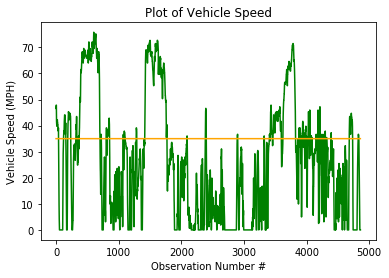

In [30]:
set35 = np.full(4859, 35)
set35
plt.plot(maxed_dataset['Vehicle speed (MPH)'], color='g')
plt.plot(set35, color='orange')
plt.xlabel('Observation Number #')
plt.ylabel('Vehicle Speed (MPH)')
plt.title('Plot of Vehicle Speed')
plt.figure(figsize=(36, 32))
plt.show()

In [31]:
#dataset.iloc[:, len(dataset.columns) - 3] #yes - way to access speed

#a function that counts how many data points are that whose speed is more than 35 
#(meaning that the car is in the highway)

def find_highway_speed(dataset, max_num):
    count = 0
    copy = dataset.copy()
    array_speed = []
    for i in range(len(dataset.index)):
        if dataset.iloc[i, len(dataset.columns) - 3] > max_num:
            count += 1
            array_speed.append(i)
    print(count)
    return array_speed

list_highway_speed = find_highway_speed(maxed_dataset, 35)

#for i in range(1,len(list_highway_speed))):
#    print(list_highway_speed[i])

1536


In [32]:
#print(list_highway_speed)
#for i in range(1,len(list_highway_speed))):
#    highway_speed_dataset = maxed_dataset[list_highway_speed[i]]


In [64]:
%%time 
#set seed here!

# Bugs to fix: split evenly driving on the high way vs city (look at speed for this)
# Split evenly the data amongst the datasets



#creating data and splitting and random shuffling
#https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test/38251213#38251213
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test

np.random.seed(88)
train, validate, test = train_validate_test_split(maxedDataSet)

train_labels = train.pop("Instant fuel economy (MPG)")
validate_labels = validate.pop("Instant fuel economy (MPG)")
test_labels = test.pop("Instant fuel economy (MPG)")

CPU times: user 4.25 ms, sys: 4.45 ms, total: 8.7 ms
Wall time: 6.86 ms


In [65]:
#train.dtypes

In [66]:
train = train.apply(lambda col:pd.to_numeric(col, errors='coerce'))

# train_stats is a pandas data frame type
train_stats = train.describe(include = 'all')
train_stats

train_stats['Vehicle speed (MPH)']

count    2916.000000
mean       27.049038
std        22.264211
min         0.000000
25%         6.213712
50%        25.476220
75%        39.767760
max        75.807290
Name: Vehicle speed (MPH), dtype: float64

In [35]:
train_stats['Vehicle speed (MPH)'][1] #mean

26.835095458710427

In [36]:
#we have to normalize test and validation data set by using the mean and sd from training data set

# Even if we make our own, the values are similar but not exact. mine vs their mean and var
# issue: i am copying the set, find better way to not copy huge set
def getMean(column):
    sum = 0
    n = len(column)
    for i in range(n):
        sum += column.iloc[i]
    mean = sum / float(n)
    return mean

def getVariance(column, mean):
    squareMeanSum = 0
    n = len(column)
    for i in range(n):
        squareMeanSum += (column.iloc[i] - mean)**2
    var = math.sqrt(squareMeanSum / float(n))
    return var

# Normalize function from sklearn was buggy so we wrote our own
# Given a data set, normalize it and return the normalized data set
def normalizeSet(set):
    numRow = len(set.index)
    numCol = len(set.columns)
#     normed_set = set
    for col in range(numCol):
        column = set.iloc[:,col]
        mean = getMean(column)
        var = getVariance(column, mean)        
#         normalize each each value in a particular feature 
        for row in range(numRow):
            set.iloc[row, col] = float(set.iloc[row, col] - mean) / var
#             normed_set.iloc[row, col] = float(set.iloc[row, col] - mean) / var
#             print(set.iloc[row, col])
    return set
normed_train = normalizeSet(train)
normed_validate = normalizeSet(validate)
normed_test = normalizeSet(test)

KeyboardInterrupt: 

In [8]:
#https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
#this method normalizes it according to the mean and sd from each set instead of 
#normalizaing from training set only# scaler = StandardScaler()

# normed_train = scaler.fit_transform(train)
# normed_validate = scaler.fit_transform(validate)
# normed_test = scaler.fit_transform(test)



In [10]:
# build models with different number of activation layers and number of nodes to explore
# which one has lowest testing error
def build_model_A():
  model = keras.Sequential([
    layers.Dense(5, activation=tf.nn.relu, input_shape=[len(train.keys())]),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

def build_model_B():
  model = keras.Sequential([
    layers.Dense(20, activation=tf.nn.relu, input_shape=[len(train.keys())]),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model


In [11]:
%%time
model_A = build_model_A()
model_A.summary()
model_B = build_model_B()
model_B.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                360       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 381
Trainable params: 381
Non-trainable params: 0
____________________________

In [12]:
%%time
# Also buggy: 

#change batch size? try early stop - The patience parameter is the amount of epochs to check for improvement
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#history_object = model.fit(train, train_labels, epochs=100, verbose=2,
#         validation_data=(validate, validate_labels), callbacks=[early_stop])

history_object_A = model_A.fit(normed_train, train_labels, epochs=250, verbose=0,
         validation_data=(normed_validate, validate_labels))

Instructions for updating:
Use tf.cast instead.
CPU times: user 34.4 s, sys: 9.84 s, total: 44.2 s
Wall time: 21.3 s


In [13]:
%%time

numEpochs = 500
# See where the error jumps on a particular example (maybe jumps when on high way or city)
history_object_B = model_B.fit(normed_train, train_labels, epochs=numEpochs, verbose=0,
         validation_data=(normed_validate, validate_labels))

CPU times: user 1min 9s, sys: 20 s, total: 1min 29s
Wall time: 42.9 s


In [21]:
# For these plots, our error is super low. There might be bugs because of the way we normalize
# TODO: Fix normalization

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.xlim([0,500])
  plt.ylim([0,50])
  plt.legend()
  plt.show()

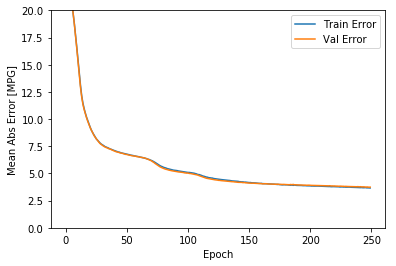

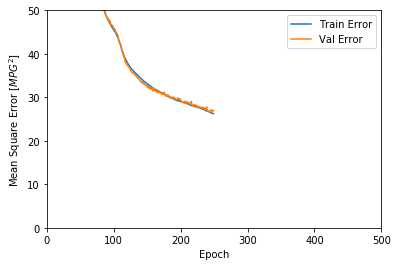

In [22]:
plot_history(history_object_A)

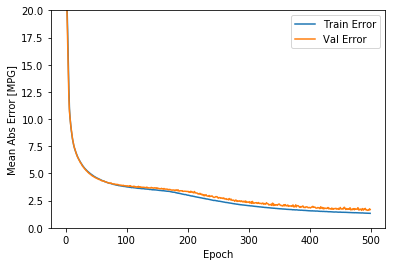

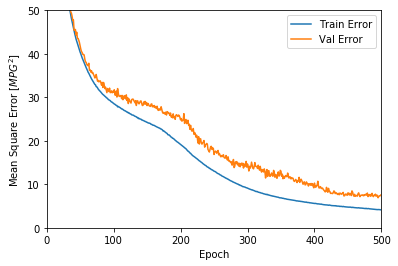

In [23]:
plot_history(history_object_B)

In [17]:
# Range of how wrong we allow a prediction to be, random number for now. unsure what is considered "good"
def accuracy(errorVec, epsilon):
    numExamples = len(errorVec)
    numCorrect = 0
    for error in errorVec:
        if abs(error) <= epsilon:
            numCorrect += 1
    print((numCorrect / float(numExamples))*100,"%")

epsilon = 1
test_predictions_B = model_B.predict(normed_test).flatten()
errorVec = test_predictions_B - test_labels
accuracy(errorVec, epsilon)



39.09465020576132 %
